# Error analysis

First, we define the simulation parameters. In this case, we are going to define an extra parameter called $N$. The profiles that we obtained in the "Introduction" and "Numerical" examples represent the variation of a given quantity with the angular separation from the precesion axis and they are computed for an interval [0, $\alpha + \beta + \delta$]. The upper limit of this interval represent the maximum separation from the precession axis reached by the FOV of the instrument. This interval is divided in $N$ points, which by default is 100.

In [1]:
from nutpy.mission import Nut
import numpy as np
import nutpy.utilities as utl
import nutpy.postprocessing.pgraph as pg

In [30]:
alpha = 45  # [deg]
beta = 50  # [deg]
Tspin = 10  # [min]
Tprec = 93  # [min]

delta_instrument = 7.5  # [deg]

Tsim = 12*3600  # [s]

dT = 0.5  # [s]

nside = 64

N = 200

SSP = [alpha, beta, Tspin, Tprec]

LB = Nut(SSP=SSP, delta_instrument=delta_instrument, dT=dT, Tsim=Tsim, nside=nside, N=N)

Then, we have to perform the numerical analysis to obtain the numerical results.

In [31]:
LB.numerical_analysis()

  0%|          | 0/49152 [00:00<?, ?it/s]

0

Once the simulation is complete, we can extract the results for each quantity. As we are only interested in the data, not the figure, we can provide the "numerical_profile" method with the argument `fig_flag=False`.

mollweide


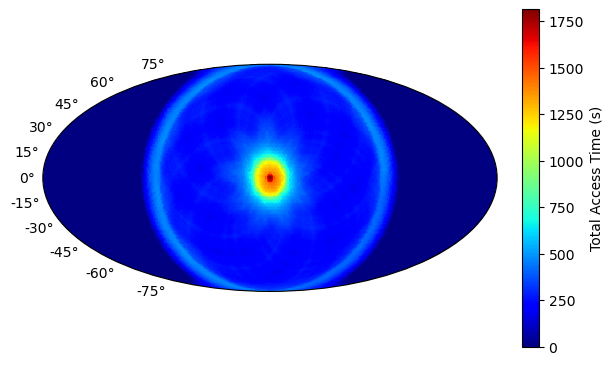

In [39]:
fig, data = LB.numerical_map(quantity="TAT")

In [33]:
_, T_tat_n = LB.numerical_profile(quantity="TAT", fig_flag=False)
_, T_mat_n = LB.numerical_profile(quantity="MAT", fig_flag=False)
_, T_max_n = LB.numerical_profile(quantity="MAX", fig_flag=False)

Then, the analytical results can be obtained similarly with the "analytical_profile" method.

In [34]:
_, T_tat_a = LB.analytical_profile(quantity="TAT", fig_flag=False)
_, T_mat_a = LB.analytical_profile(quantity="MAT", fig_flag=False)
_, T_max_a = LB.analytical_profile(quantity="MAX", fig_flag=False)

Now we can compare both results. To represent the curves correctly, we can build ourselves the array that represents the angle separation from the precession axis.

In [35]:
phi = np.linspace(0, alpha + beta + delta_instrument, N)
legend = ['Analytical', 'Numerical']

3.98238759552683

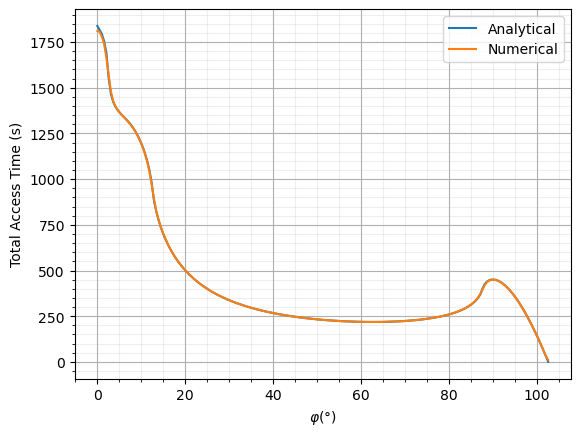

In [36]:
fig_tat, ax_tat = pg.plot_double_results(phi, T_tat_a, T_tat_n, xlabel=r'$\varphi (°)$', ylabel='Total Access Time (s)', grid=True, legend=legend)
utl.rmse(T_tat_n, T_tat_a)

0.2747825515026028

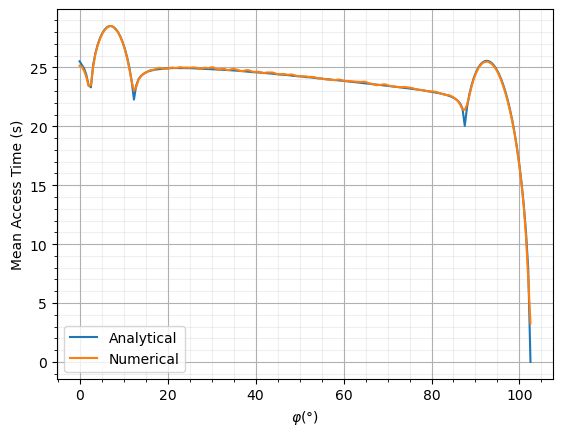

In [37]:
fig_mat, ax_mat = pg.plot_double_results(phi, T_mat_a, T_mat_n, xlabel=r'$\varphi (°)$', ylabel='Mean Access Time (s)', grid=True, legend=legend)
utl.rmse(T_mat_n, T_mat_a)

6.592798496293186

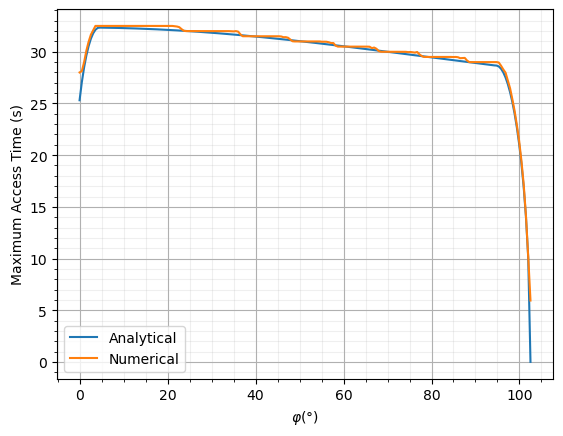

In [38]:
fig_max, ax_max = pg.plot_double_results(phi, T_max_a, T_max_n, xlabel=r'$\varphi (°)$', ylabel='Maximum Access Time (s)', grid=True, legend=legend)
utl.rmse(T_max_n, T_mat_a)

The first factor contributing to the error of the numerical results regarding the analytical is the time step ($dT$). This will set the accuracy of the results. The second factor is the discretization of the sky due to the interpolation method used by the healpy library (bilinear method). Therefore, the error can be reduced using higher values of nside and lower values of $dT$. However, beware that the computation time grows inversely proportional to $dT$ and twice as much as nside.